# Gradient descent - Adam

We want to show the behaviour of the Adam optimizer on the Beale function as shown in the lecture.
 

In [105]:
#Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

First we will define our Adam optimizer and helper functions to visualize our trajectories on the gradient of the Beale function 

In [106]:
# Define Beale function, its gradient function and contour plot function (taken from the lecture notebook gradient_descent2020.ipynb)
def beales_function(x, y):
    f = np.square(1.5 - x + x * y) + np.square(2.25 - x + x * y * y) + np.square(2.625 - x + x * y ** 3)
    return f


def grad_beales_function(params):
    x = params[0]
    y = params[1]
    grad_x = 2 * (1.5 - x + x * y) * (-1 + y) + 2 * (2.25 - x + x * y ** 2) * (-1 + y ** 2) + 2 * (
            2.625 - x + x * y ** 3) * (-1 + y ** 3)
    grad_y = 2 * (1.5 - x + x * y) * x + 4 * (2.25 - x + x * y ** 2) * x * y + 6 * (2.625 - x + x * y ** 3) * x * y ** 2
    return [grad_x, grad_y]


def contour_beales_function():
    # plot beales function
    x, y = np.meshgrid(np.arange(-10.5, 10.5, 0.01), np.arange(-10.5, 4.5, 0.01))
    fig, ax = plt.subplots(figsize=(10, 10))
    z = beales_function(x, y)
    ax.contour(x, y, z, levels=np.logspace(0, 5, 45), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3, 0.5, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-10.5, 10.5))
    ax.set_ylim((-4.5, 4.5))

    return fig, ax

# Plotter function to place a 2D trajectory over a given contour plot
def overlay_trajectory_on_contour(ax, trajectory, label='', color='black', linewidth=2):
    x_values = trajectory[:, 0]
    y_values = trajectory[:, 1]

    ax.plot(x_values, y_values, color=color, label=label, linewidth=linewidth)

    # Mark start position
    ax.plot(x_values[0], y_values[0], color=color, marker='+', markersize=14)
    # Mark end position
    ax.plot(x_values[-1], y_values[-1], color=color, marker='h', markersize=10)
    return ax

# Define Adam optimizer
def adam(gradient_function, initial_parameters, n_epochs=5000, eta=10 ** -3, beta_1=0.9, beta_2=0.99, epsilon=10 ** -8,
         noise_strength=0):
    params = np.array(initial_parameters)
    params_trajectory = np.zeros([n_epochs + 1, len(params)])
    params_trajectory[0,] = initial_parameters
    
    #initialize the first and second momentum for t=0
    first_momentum_of_gradient = 0
    second_momentum_of_gradient = 0
    
    #To avoid beta^0 in the momenta correction, I shift index counting by 1 so t starts at 1
    for t in range(1, n_epochs + 1):  
        #Compute gradient (with noise)
        noise = noise_strength * np.random.randn(params.size)
        gradient = np.array(gradient_function(params)) + noise
        
        #Compute momenta
        first_momentum_of_gradient = beta_1*first_momentum_of_gradient + (1 - beta_1) * gradient
        second_momentum_of_gradient = beta_2 * second_momentum_of_gradient + (1 - beta_2) * gradient * gradient
        
        #Compute momenta with bias correction
        first_momentum_of_gradient_corrected = np.divide(first_momentum_of_gradient, 1 - np.power(beta_1, t))
        second_momentum_of_gradient_corrected = np.divide(second_momentum_of_gradient, 1 - np.power(beta_2, t))
        
        #Compute parameter update
        v = eta * np.divide(first_momentum_of_gradient_corrected, np.sqrt(second_momentum_of_gradient_corrected) + epsilon)
        params = params - v
        
        #Update parameter trajectory
        params_trajectory[t,] = params
    return params_trajectory

Now we will visualize the behaviour of our implemented Adam optimizer for two different starting points and two different learning rates $\eta$.

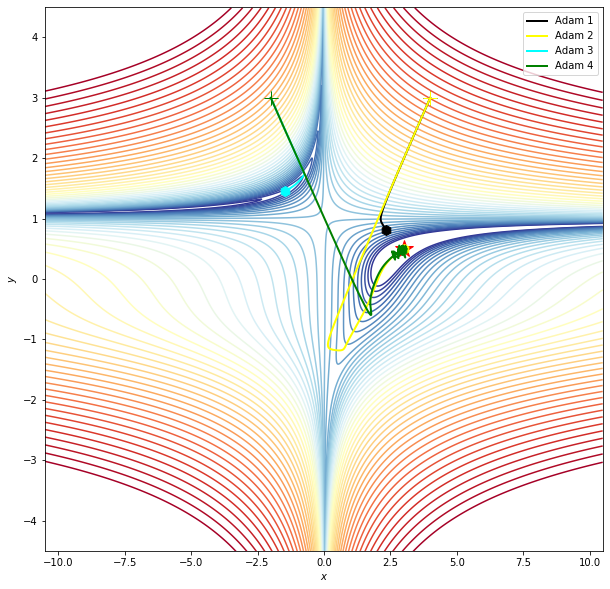

In [107]:
number_of_epochs = 5000

starting_point_1 = [4, 3]
starting_point_2 = [-2, 3]

learning_rate_1 = 5 * 10 ** -4
learning_rate_2 = 5 * 10 ** -1

adam_trajectory_1 = adam(grad_beales_function, starting_point_1, number_of_epochs, eta=learning_rate_1)
adam_trajectory_2 = adam(grad_beales_function, starting_point_1, number_of_epochs, eta=learning_rate_2)
adam_trajectory_3 = adam(grad_beales_function, starting_point_2, number_of_epochs, eta=learning_rate_1)
adam_trajectory_4 = adam(grad_beales_function, starting_point_2, number_of_epochs, eta=learning_rate_2)


fig1, axis = contour_beales_function()
overlay_trajectory_on_contour(axis, adam_trajectory_1, label='Adam 1', color='black')
overlay_trajectory_on_contour(axis, adam_trajectory_2, label='Adam 2', color='yellow')
overlay_trajectory_on_contour(axis, adam_trajectory_3, label='Adam 3', color='cyan')
overlay_trajectory_on_contour(axis, adam_trajectory_4, label='Adam 4', color='green')

plt.legend()

The visualization above gives us a very good idea of the influence of starting points and learning rates.
For the trajectories **Adam 1** and **Adam 2** the starting point is the same, but the learning rate of **Adam 2** is lot bigger (by a factor $10^3$) than the learning rate of **Adam 1**. The progress of **Adam 2** is therefore a lot faster and it was able to reach the optimum in 5000 epochs. While **Adam 1** could not reach the optimum in 5000 epochs it seems to have found a shorter route towarrds the optimum. **Adam 2** however missed this "shortcut" due to its large learning rate and took the long way round.
Trajectories **Adam 3** and **Adam 4** also have the same starting point. Again we see that **Adam 4** with the bigger learning rate was able to reach the global optimum in 5000 epochs, whereas **Adam 3** seems to be stuck in a local optimum. This illustrates that although smaller learning rates can be more efficient in finding the global optimum they also run into the risk of getting stuck in a local optimum if the starting point is choosen badly. Whereas a bigger learning rates seem to be more robust to the choice of starting points but can be more inefficient and taking a longer route to the global optimum.

Now we fix our hyper-parameters $(\eta = 10^{-3}, \beta_1 = 0.9, \beta_2 = 0.99 \text{ and } \epsilon = 10^{-8})$ and scan over a grid of starting points.

In [111]:
# Initialize x and y values of our grid
x_coordinates = np.linspace(-7.5, 7.5, 4)
y_coordinates = np.linspace(-3, 3, 4)

# Initialize a array to store our trajectories
trajectories = []
# Construct a grid with our x and y values
x_values_of_grid, y_values_of_grid = np.meshgrid(x_coordinates, y_coordinates)

# Compute trajectories for each starting point on the grid
for x_index in range(4):
    for y_index in range(4):
        starting_point = [x_values_of_grid[x_index][y_index], y_values_of_grid[x_index][y_index]]
        trajectory = adam(grad_beales_function, starting_point, eta=10**-3, beta_1=0.9, beta_2=0.99, epsilon=10**-8)
        trajectories.append(trajectory)
        
# Define some colors for the trajectories and construct a gradient plot of the Beales function
colors = ['black', 'lightcoral', 'darkred', 'tomato', 'chocolate', 'darkorange', 'olive', 'yellow', 'lawngreen',
          'turquoise', 'darkcyan', 'cyan', 'royalblue', 'mediumpurple', 'darkviolet', 'deeppink']
figure, axis = contour_beales_function()


# Plot trajectories
for index, trajectory in enumerate(trajectories):
    starting_point = trajectory[0]
    overlay_trajectory_on_contour(axis, trajectory, color=colors[index])

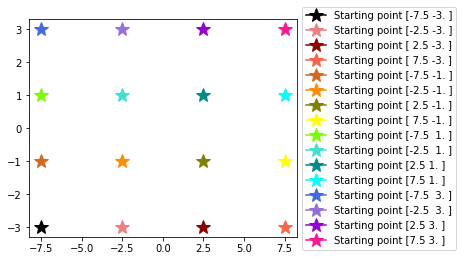

In [109]:
# Plot a separate figure containing the legend and starting points
fig = plt.figure()
ax = plt.subplot()
for index, trajectory in enumerate(trajectories):
    starting_point = trajectory[0]
    label = 'Starting point {point}'.format(point=starting_point)
    ax.plot(starting_point[0], starting_point[1], label=label, color=colors[index], marker='*', markersize=14)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In the visualization above we can see the importance of choosing a good starting point. We see that there is a local optimum in the upper-left quadrant, whereas the global optimum is on the right side. Unsurprisingly, trajectories that start closer to the local optimum also tend to get caught in there, while starting points that are closer to the global optimum do indeed find there way to the global optimum. It should be noted that as discussed previously that a larger learning rate could help trajectories get out of a local minimum.